In [73]:
# Step 1: Data Import & Cleaning - Goal: Import the CSV file and clean the data for analysis.

import pandas as pd

# loading the data and what needs cleaning

df = pd.read_csv("owid_climate_data.csv")
print(df[["CO2 Emissions Per Capita", "Annual Temperature Anomaly"]].isna().sum())
df_cleaned = df.dropna(subset=["CO2 Emissions Per Capita", "Annual Temperature Anomaly"])


# Displaying the cleaned data

print(f"\nRows before cleaning: {len(df)}")
print(f"Rows after cleaning: {len(df_cleaned)}")
print("\nMissing values after cleaning:")
print(df_cleaned[["CO2 Emissions Per Capita", "Annual Temperature Anomaly"]].isna().sum())
df_cleaned.head()




CO2 Emissions Per Capita          0
Annual Temperature Anomaly    11863
dtype: int64

Rows before cleaning: 26182
Rows after cleaning: 14319

Missing values after cleaning:
CO2 Emissions Per Capita      0
Annual Temperature Anomaly    0
dtype: int64


,Country Name,Country Code,Year,CO2 Emissions Per Capita,Annual Temperature Anomaly
0,Afghanistan,AFG,1949,0.001992,-2.020418
1,Afghanistan,AFG,1950,0.010837,-2.298886
2,Afghanistan,AFG,1951,0.011625,-1.287201
3,Afghanistan,AFG,1952,0.011468,-1.237078
4,Afghanistan,AFG,1953,0.013123,-1.084867


In [15]:
# Step 2: Sets & Functions - Goal: Explore unique values and practice basic data retrieval.

# Create a set of all countries

countries = sorted(set(df_cleaned['Country Name'].unique()))
print("All countries in the dataset:")
for i, country in enumerate(countries, start=1):
    print(f"{i}. {country}")
    
# Function that will return data for a country and year range

def get_country_data(df_cleaned, country_name, start_year, end_year):
    filtered_df = df[
        (df['Country Name'] == country_name) & 
        (df['Year'] >= start_year) & 
        (df['Year'] <= end_year)
    ]
    return filtered_df

# Testing the function on a country (Brazil)
brazil_data = get_country_data(df_cleaned, "Brazil", 2000, 2010)
brazil_data

All countries in the dataset:
1. Afghanistan
2. Albania
3. Algeria
4. Andorra
5. Angola
6. Anguilla
7. Antigua and Barbuda
8. Argentina
9. Armenia
10. Australia
11. Austria
12. Azerbaijan
13. Bahamas
14. Bahrain
15. Bangladesh
16. Belarus
17. Belgium
18. Belize
19. Benin
20. Bhutan
21. Bolivia
22. Bosnia and Herzegovina
23. Botswana
24. Brazil
25. Brunei
26. Bulgaria
27. Burkina Faso
28. Burundi
29. Cambodia
30. Cameroon
31. Canada
32. Cape Verde
33. Central African Republic
34. Chad
35. Chile
36. China
37. Colombia
38. Comoros
39. Congo
40. Cook Islands
41. Costa Rica
42. Cote d'Ivoire
43. Croatia
44. Cuba
45. Cyprus
46. Czechia
47. Democratic Republic of Congo
48. Denmark
49. Djibouti
50. Dominican Republic
51. East Timor
52. Ecuador
53. Egypt
54. El Salvador
55. Equatorial Guinea
56. Eritrea
57. Estonia
58. Eswatini
59. Ethiopia
60. Faroe Islands
61. Fiji
62. Finland
63. France
64. French Polynesia
65. Gabon
66. Gambia
67. Georgia
68. Germany
69. Ghana
70. Greece
71. Greenland
72. G

,Country Name,Country Code,Year,CO2 Emissions Per Capita,Annual Temperature Anomaly
3615,Brazil,BRA,2000,1.954870,-0.530414
3616,Brazil,BRA,2001,1.963492,-0.209882
3617,Brazil,BRA,2002,1.948226,0.192227
3618,Brazil,BRA,2003,1.908094,-0.023602
3619,Brazil,BRA,2004,1.978562,-0.149909
3620,Brazil,BRA,2005,1.972900,0.172798
3621,Brazil,BRA,2006,1.976239,-0.058517
3622,Brazil,BRA,2007,2.071431,0.136714
3623,Brazil,BRA,2008,2.167589,-0.211528
3624,Brazil,BRA,2009,2.029234,0.012614


In [16]:
# step 3 logical filtering - Goal: Apply Boolean logic to isolate patterns.

# Collecting the data 
co2_emissions = df_cleaned[(df_cleaned['Year'] == 2020) & (df_cleaned['CO2 Emissions Per Capita'] > 10)] 

# Displaying the  Country Name, CO2, and Temperature columns
co2_emissions_filtered = co2_emissions[['Country Name', 'CO2 Emissions Per Capita', 'Annual Temperature Anomaly']]

# Show the data results
co2_emissions_filtered

,Country Name,CO2 Emissions Per Capita,Annual Temperature Anomaly
1729,Australia,15.506062,0.413426
2272,Bahrain,25.215979,0.544875
3788,Brunei,24.939121,0.488073
4447,Canada,13.795024,0.144869
8826,Faroe Islands,14.426020,0.148138
12876,Kazakhstan,13.113933,0.940694
13121,Kuwait,21.739220,0.725706
14411,Luxembourg,12.806264,1.281792
15578,Mongolia,11.265909,0.466132
16476,New Caledonia,17.981370,0.353113


In [17]:
# Step 4: Probability & Summary Statistics - Goal: Use descriptive statistics to evaluate data trends.

# Calculate the mean, min, and max of temperature for each year
temp_stats = df_cleaned.groupby('Year')['Annual Temperature Anomaly'].agg(['mean', 'min', 'max'])
print("-Temperature Summary-")
print(temp_stats)


# Estimate the probability (as a percentage) that temperature exceeds 1.5°C
exceeding = df_cleaned[df_cleaned['Annual Temperature Anomaly'] > 1.5]
probability = (len(exceeding) / len(df_cleaned)) * 100

print(f"Probability of temperature > 1.5°C: {probability:.2f}%")


-Temperature Summary-
          mean       min       max
Year                              
1940 -1.624415 -3.825056  0.423903
1941 -1.251653 -3.941369  1.779448
1942 -1.368997 -3.628582  0.683115
1943 -1.021218 -2.985201  1.080043
1944 -1.000902 -2.997106  0.915558
...        ...       ...       ...
2019  0.601391 -0.226331  1.697816
2020  0.580830 -0.231912  2.247584
2021  0.411804 -0.655329  1.511456
2022  0.444629 -0.582847  1.773571
2023  0.862665 -0.266950  1.894608

[84 rows x 3 columns]
Probability of temperature > 1.5°C: 0.34%


In [18]:
# Step 5: Counting Principles Goal: Understand the structure and complexity of the dataset.

# Count how many unique year-country combinations exist in the dataset

combos = df_cleaned.groupby(['Country Name', 'Year']).size()
print("Number of combinations:", len(combos)) 

# This data is showing us the combination sets in the  dataset and covers multiple countries 
# This is providing a strong basis for identifying the changes in CO₂ emissions and temperature changes in different countries

Number of combinations: 14319


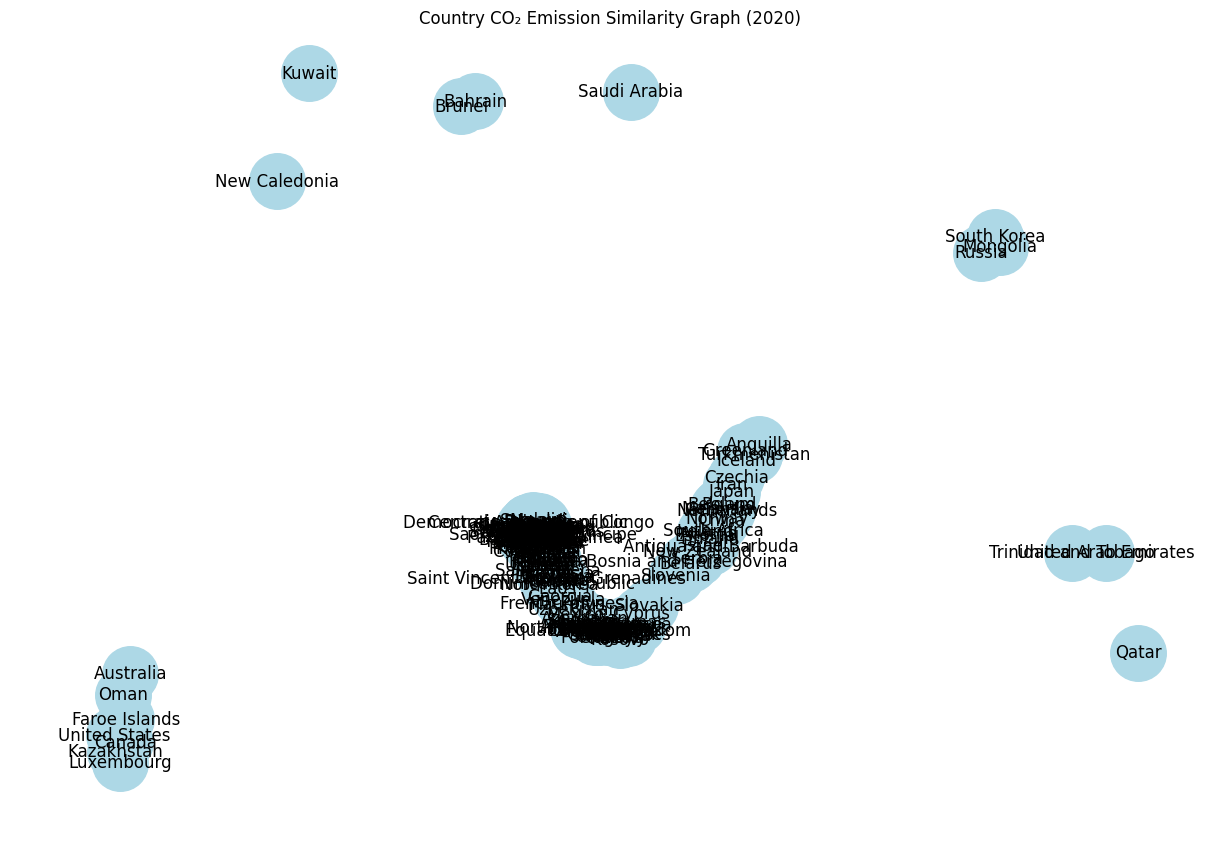

Nodes: 187, Edges: 3886


In [86]:
# Step 6: Graph Theory & Networks - Goal: Build a simple country-emission similarity graph.
import networkx as nx
import matplotlib.pyplot as plt

# loads filtered data 
df_2020 = df_cleaned[df_cleaned['Year'] == 2020]

# Build graph
G = nx.Graph()
G.add_nodes_from(df_2020['Country Name'])

# # Add edges if emission difference < 1.0
for i in range(len(df_2020)):
    for j in range(i + 1, len(df_2020)):
        country1 = df_2020.iloc[i]['Country Name']
        country2 = df_2020.iloc[j]['Country Name']
        emission1 = df_2020.iloc[i]['CO2 Emissions Per Capita']
        emission2 = df_2020.iloc[j]['CO2 Emissions Per Capita']
        
        if abs(emission1 - emission2) < 1:
            G.add_edge(country1, country2)
           


plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.8, seed=42)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1600, font_size=12)
plt.title("Country CO₂ Emission Similarity Graph (2020)")
plt.show()

print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

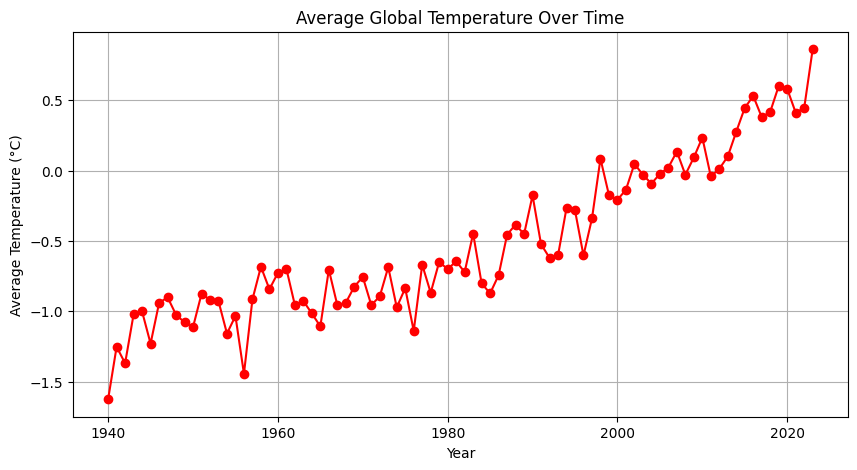

In [79]:
#  Step 7 Aggregation & Visualization - Goal: Create visual insights using groupings and plots.
# A line chart of average temperature over time

import matplotlib.pyplot as plt

# Group by year and calculate average temperature
avg_temp_per_year = df_cleaned.groupby('Year')['Annual Temperature Anomaly'].mean()

# Plot line chart
plt.figure(figsize=(10, 5))
avg_temp_per_year.plot(kind='line', marker='o', color='red')
plt.title("Average Global Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()

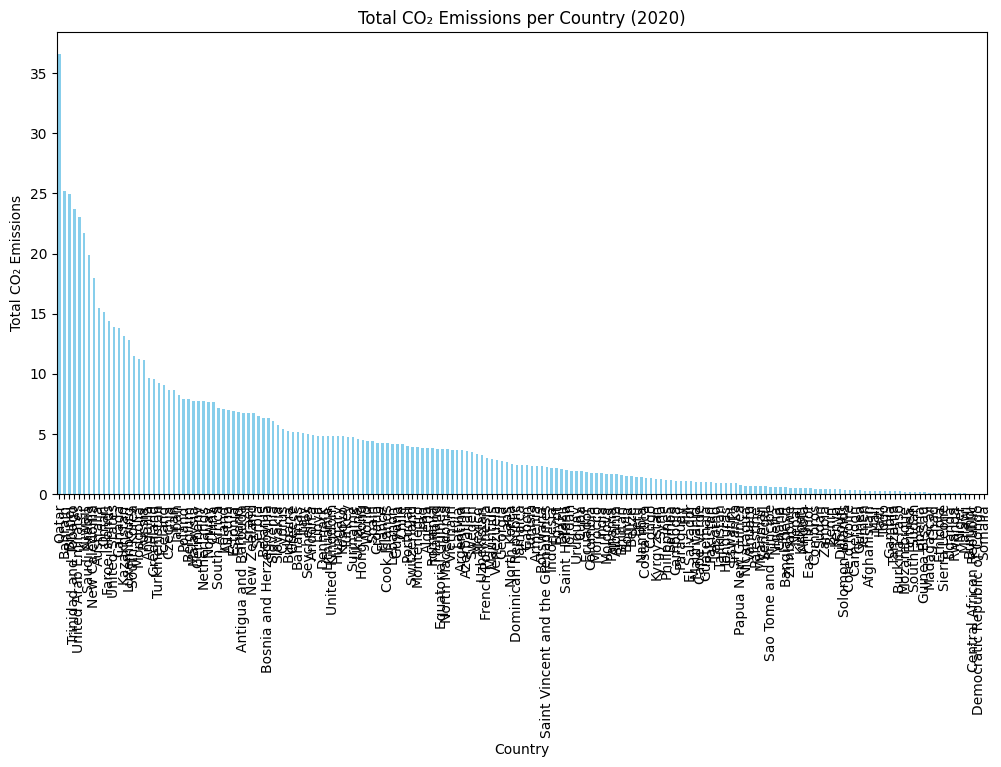

In [77]:
# CO₂ emissions for each country in 2020
df_2020 = df_cleaned[df_cleaned['Year'] == 2020]

co2_2020 = df_2020.groupby('Country Name')['CO2 Emissions Per Capita'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
co2_2020.plot(kind='bar', color='skyblue')
plt.title("Total CO₂ Emissions per Country (2020)")
plt.xlabel("Country")
plt.ylabel("Total CO₂ Emissions")
plt.show()


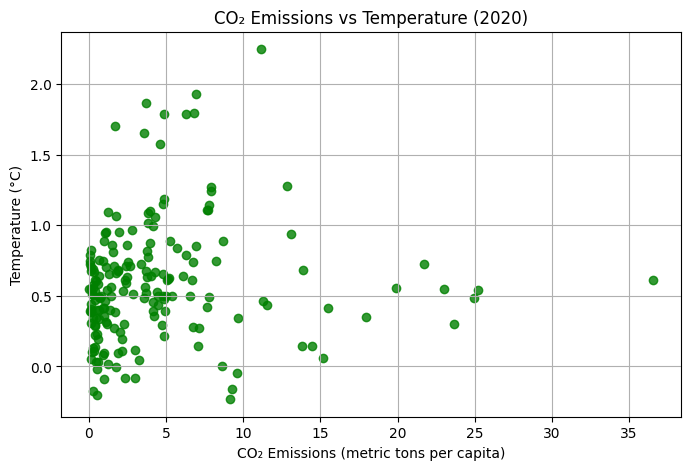

In [89]:
plt.figure(figsize=(8,5))
plt.scatter(df_2020['CO2 Emissions Per Capita'], df_2020['Annual Temperature Anomaly'], color='green', alpha=0.8)
plt.title("CO₂ Emissions vs Temperature (2020)")
plt.xlabel("CO₂ Emissions (metric tons per capita)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()